In [34]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [6]:
df = pd.read_csv("../RStanBook/chap04/input/data-salary.txt")

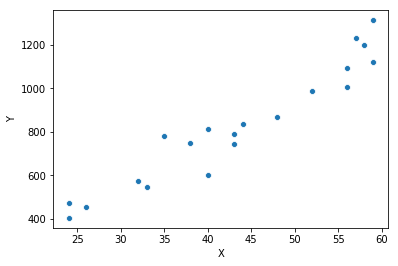

In [13]:
sns.scatterplot(data=df, x=df.X, y=df.Y)

In [22]:
result = sm.OLS(df.Y, sm.add_constant(df.X)).fit()

In [37]:
_, u, b = wls_prediction_std(result)
_, u50, b50 = wls_prediction_std(result, alpha=0.5)

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     208.2
Date:                Mon, 31 Dec 2018   Prob (F-statistic):           2.47e-11
Time:                        13:35:41   Log-Likelihood:                -114.74
No. Observations:                  20   AIC:                             233.5
Df Residuals:                      18   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -119.6971     68.148     -1.756      0.096    -262.871      23.477
X             21.9042      1.518     14.428      0.000      18.715      25.094
==============================================================================
Omnibus:                        0.099   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.216
Skew:                           0.140   Prob(JB):                        0.898
Kurtosis:                       2.575   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

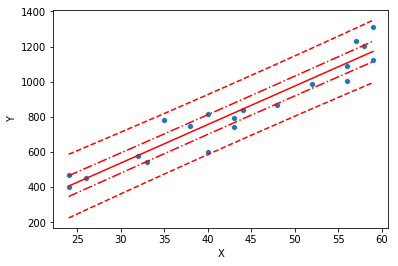

In [38]:
sns.scatterplot(data=df, x=df.X, y=df.Y)
plt.plot(df.X, result.predict(), 'r')
plt.plot(df.X, u, 'r--')
plt.plot(df.X, b, 'r--')
plt.plot(df.X, u50, 'r-.')
plt.plot(df.X, b50, 'r-.')